In [229]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib as plt
import matplotlib.pyplot as plt
import string
import re
import random
import datetime as dt
from datetime import datetime
sns.set_style('darkgrid')

In [230]:
df = pd.read_csv('./database.csv')

In [231]:
df.head(2).T

,0,1
Official Name of Satellite,AAUSat-4,ABS-2
Country/Organization of UN Registry,NR,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational
Users,Civil,Commercial
Purpose,Earth Observation,Communications
Detailed Purpose,Automatic Identification System (AIS),NaN
Class of Orbit,LEO,GEO
Type of Orbit,Sun-Synchronous,NaN
Longitude of Geosynchronous Orbit (Degrees),0,75


In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 26 columns):
Official Name of Satellite                     1420 non-null object
Country/Organization of UN Registry            1420 non-null object
Operator/Owner                                 1419 non-null object
Country of Operator/Owner                      1420 non-null object
Users                                          1419 non-null object
Purpose                                        1419 non-null object
Detailed Purpose                               369 non-null object
Class of Orbit                                 1419 non-null object
Type of Orbit                                  899 non-null object
Longitude of Geosynchronous Orbit (Degrees)    1402 non-null float64
Perigee (Kilometers)                           1419 non-null float64
Apogee (Kilometers)                            1419 non-null float64
Eccentricity                                   1419 non-null float64
Inclina

In [233]:
df.isna().sum()

Official Name of Satellite                        0
Country/Organization of UN Registry               0
Operator/Owner                                    1
Country of Operator/Owner                         0
Users                                             1
Purpose                                           1
Detailed Purpose                               1051
Class of Orbit                                    1
Type of Orbit                                   521
Longitude of Geosynchronous Orbit (Degrees)      18
Perigee (Kilometers)                              1
Apogee (Kilometers)                               1
Eccentricity                                      1
Inclination (Degrees)                             1
Period (Minutes)                                  3
Launch Mass (Kilograms)                         103
Dry Mass (Kilograms)                            947
Power (Watts)                                   771
Date of Launch                                    4
Expected Lif

In [234]:
data = pd.read_csv("./database.csv", usecols=[0,1,2,3,4,5,7,9,10,11,12,13,14,15,18,19,20,21,22,23,24,25])

In [306]:
data.shape

(1420, 25)

In [235]:
data.head(5).T

,0,1,2,3,4
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A,ABS-3,ABS-3A
Country/Organization of UN Registry,NR,NR,NR,Philippines,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational,Multinational,Multinational,Multinational
Users,Civil,Commercial,Commercial,Commercial,Commercial
Purpose,Earth Observation,Communications,Communications,Communications,Communications
Class of Orbit,LEO,GEO,GEO,GEO,GEO
Longitude of Geosynchronous Orbit (Degrees),0,75,-75,146.06,-3
Perigee (Kilometers),442,35778,35700,35769,35788
Apogee (Kilometers),687,35793,35700,35802,35803


In [236]:
name_of_satellite = data['Official Name of Satellite']

In [237]:
name_of_satellite.value_counts()

USA 229                2
USA 194                2
USA 238                2
USA 181                2
USA 264                2
Garuda-1               1
INMARSAT 3 F1          1
ASNARO-1               1
AsiaStar               1
Iridium 30             1
Galileo FOC FM2        1
NSS-11                 1
Iridium 43             1
USA 244                1
Astrosat               1
Cosmos 2465            1
Beidou G3              1
Yaogan 19              1
INMARSAT 5 F2          1
Condor E2              1
ORBCOMM FM-27          1
Shijian 11 01          1
Measat 3               1
Meteosat 9             1
Eutelsat 113 West-A    1
Cosmos 2426            1
Qsat-EOS               1
LilacSat-2             1
Iridium 75             1
Kizuna                 1
                      ..
MetOp-B                1
Fengyun 2E             1
Dove 1e-14             1
ORBCOMM FM-19          1
Beidou 2-15            1
Turksat 4A             1
Astra 3A               1
Turksat 4B             1
Worldview 3            1


Text(0.5,1,'Satellite Using By Differnt Users')

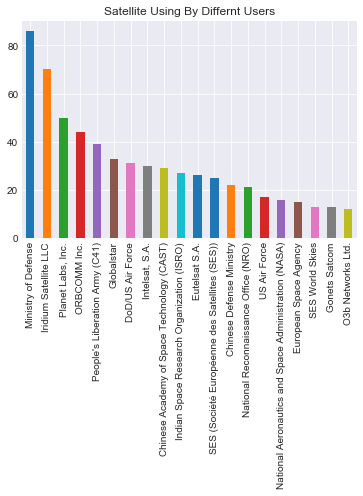

In [238]:
operator_owner = data['Operator/Owner'] 
operator_owner.value_counts().head(20).plot(kind='bar')
plt.title('Satellite Using By Differnt Users')

Text(0.5,1,'Satellite Overview Based On Each Country')

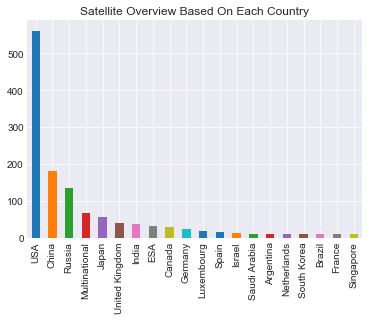

In [239]:
country_operator_owner = data['Country of Operator/Owner']
country_operator_owner.value_counts().head(20).plot(kind='bar')
plt.title('Satellite Overview Based On Each Country')

Text(0.5,1,'Uses of Satellites In World')

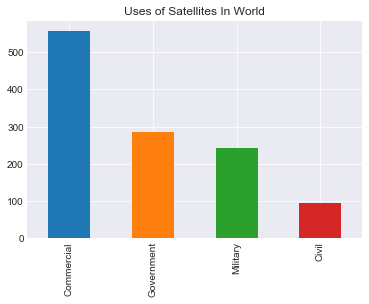

In [240]:
users = data['Users']
users.value_counts().head(4).plot(kind='bar')
plt.title('Uses of Satellites In World')

Text(0.5,1,'Purpose')

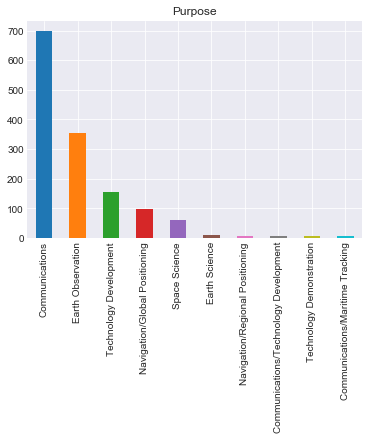

In [241]:
purpose = data['Purpose']
purpose.value_counts().head(10).plot(kind='bar')
plt.title('Purpose')

Text(0.5,1,'Satellites vs Class of orbit')

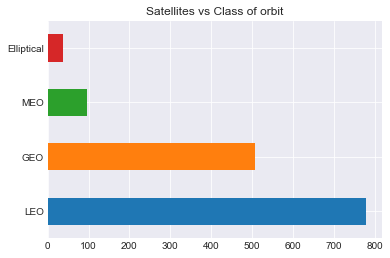

In [242]:
class_of_orbit = data['Class of Orbit']
class_of_orbit.value_counts().head(4).plot(kind='barh')
plt.title('Satellites vs Class of orbit')

* **`LEO`**: Low Earth Orbit
* **`MEO`**: Medium Earth Orbit
* **`GEO`**: Geostationary orbit



In [243]:
data['date'] = pd.to_datetime(data['Date of Launch'])
data['year'], data['month'] = data['date'].dt.year, data['date'].dt.month

date_count = data.groupby('date').date.count()
values = date_count.values
# print(values)
dates = date_count.index
# print(dates)

mean = sum(values)/len(date_count)
# print(mean)
variance = np.sqrt(sum((values-mean)**2)/len(date_count))
# print(variance)

# plt.bar(dates, values)
# sns.barplot(dates, values)
# plt.title('Number of Lanuches Per year')
# plt.xticks(rotation='70')
# plt.show()

In [244]:
data.groupby(['Country of Operator/Owner','Purpose'])['Users'].size()

Country of Operator/Owner  Purpose                                 
Algeria                    Earth Observation                             1
Argentina                  Communications                                4
                           Communications/Technology Development         2
                           Earth Observation                             2
                           Technology Development                        3
Australia                  Communications                                7
Austria                    Technology Development                        1
Azerbaijan                 Communications                                1
Belarus                    Communications                                1
                           Earth Observation                             1
Belgium                    Space Science                                 2
                           Technology Development                        1
Bolivia                    Commu

In [245]:
data.groupby(['Launch Site']).size()

Launch Site
Baikonur Cosmodrome                259
Cape Canaveral                     212
Dombarovsky Air Base                65
Guiana Space Center                222
International Space Station         29
Jiuquan Satellite Launch Center     59
Kodiak Launch Complex                5
Kwajalein Island                     2
Naro Space Center                    1
Palmachim Launch Complex             4
Plesetsk Cosmodrome                 91
Satish Dhawan                        1
Satish Dhawan Space Center          73
Satish Dhawan Space Center           1
Satish Dhawan Space Centre          12
Sea Launch                           4
Sea Launch (Odyssey)                25
Svobodny Cosmodrome                  3
Taiyuan Launch Center               81
Tanegashima Space Center            33
Uchinoura Space Center               3
Vandenberg AFB                     138
Vostochny Cosmodrome                 3
Wallops Island Flight Facility      32
Xichang Satellite Launch Center     61
dtype: int64

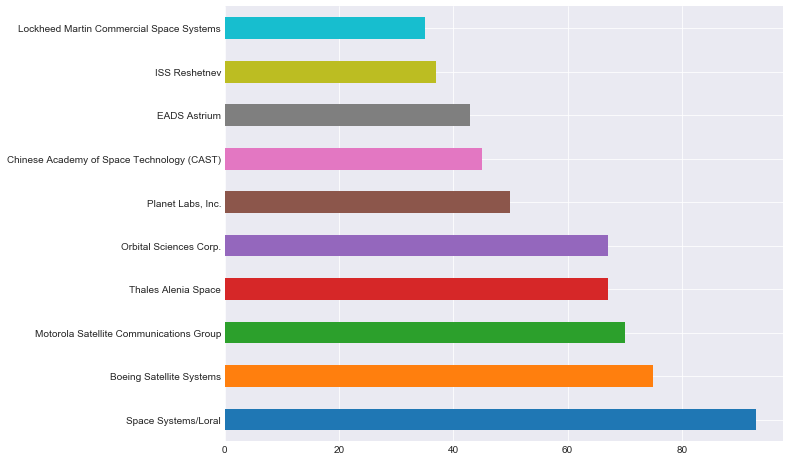

In [246]:
data['Contractor'].sort_values().value_counts().head(10).plot(kind='barh', figsize=(10, 8))

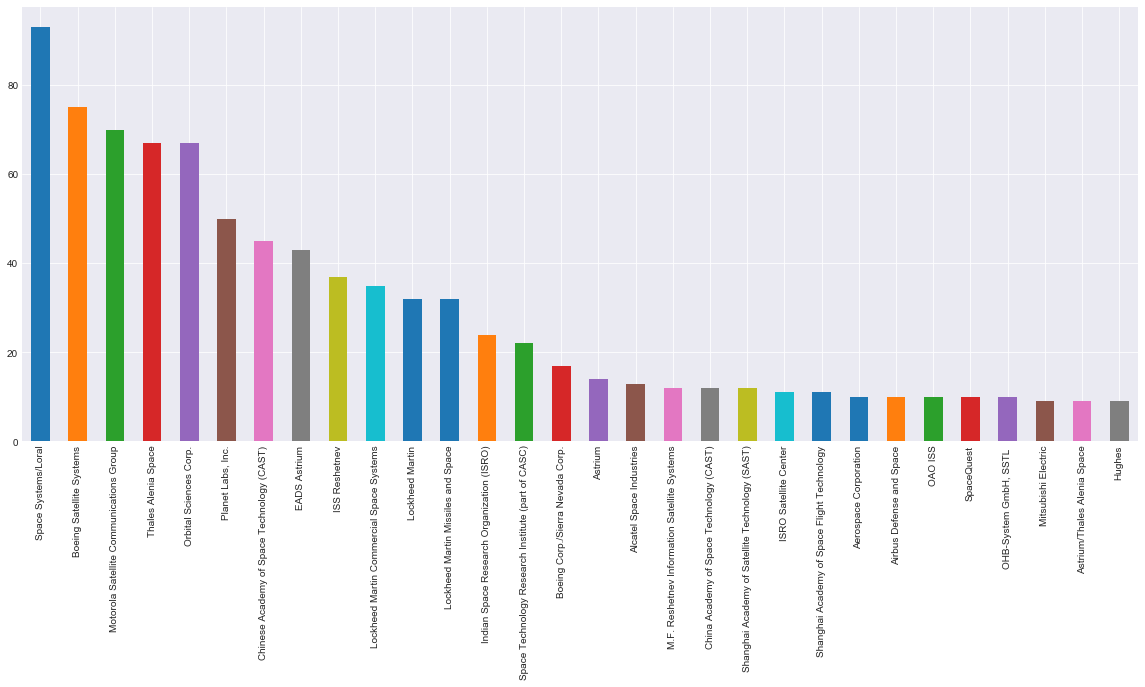

In [247]:
data['Contractor'].value_counts().head(30).plot(kind='bar', figsize = (20, 8))

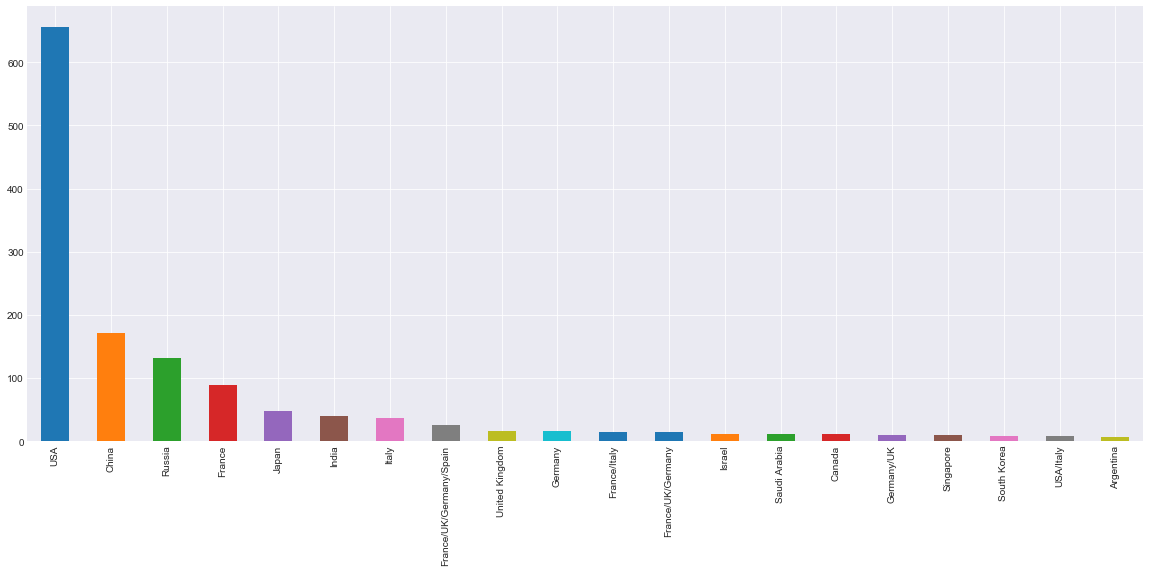

In [248]:
data['Country of Contractor'].value_counts().head(20).plot(kind='bar', figsize = (20, 8))

In [261]:
df1 = pd.crosstab(data['date'], data['Country of Operator/Owner'])

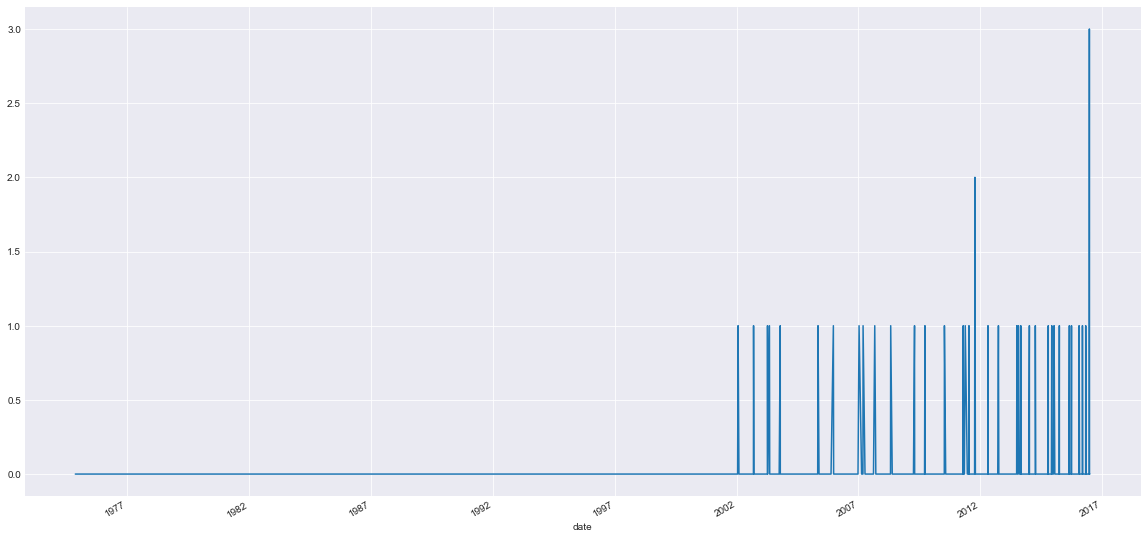

In [262]:
df1['India'].plot(kind='line', figsize = (20, 10))

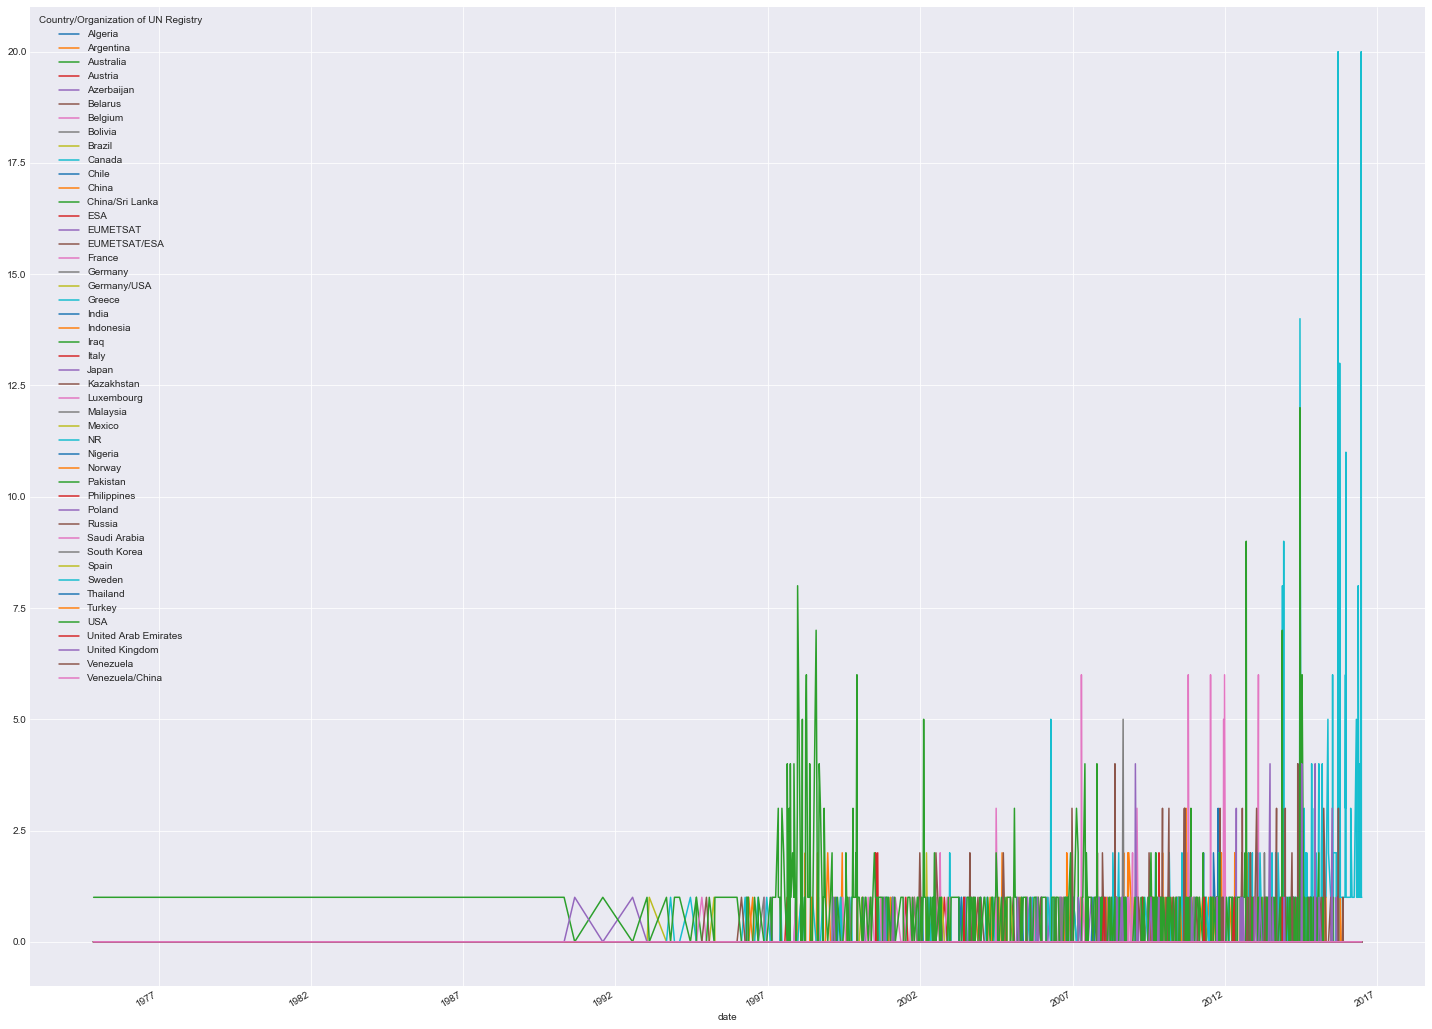

In [288]:
df2 = pd.crosstab(data['date'], data['Country/Organization of UN Registry'])
df2.plot(kind='line', figsize = (25, 20))

In [266]:
data.head().T

,0,1,2,3,4
Official Name of Satellite,AAUSat-4,ABS-2,ABS-2A,ABS-3,ABS-3A
Country/Organization of UN Registry,NR,NR,NR,Philippines,NR
Operator/Owner,University of Aalborg,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.,Asia Broadcast Satellite Ltd.
Country of Operator/Owner,Denmark,Multinational,Multinational,Multinational,Multinational
Users,Civil,Commercial,Commercial,Commercial,Commercial
Purpose,Earth Observation,Communications,Communications,Communications,Communications
Class of Orbit,LEO,GEO,GEO,GEO,GEO
Longitude of Geosynchronous Orbit (Degrees),0,75,-75,146.06,-3
Perigee (Kilometers),442,35778,35700,35769,35788
Apogee (Kilometers),687,35793,35700,35802,35803


In [289]:
data['Apogee (Kilometers)'].max()

330000.0

In [290]:
data['Apogee (Kilometers)'].min()

322.0

In [291]:
data['Perigee (Kilometers)'].min()

200.0

In [292]:
data['Perigee (Kilometers)'].max()

62200.0

In [314]:
pd.crosstab(data['Period (Minutes)'], data['Class of Orbit'])


Class of Orbit,Elliptical,GEO,LEO,LEO,MEO
Period (Minutes),,,,,
100,0,0,1,0,0
100.2,0,0,2,0,0
100.3,0,0,10,0,0
100.4,0,0,68,0,0
100.53,0,0,1,0,0
100.62,0,0,1,0,0
100.7,0,0,19,0,0
100.73,0,0,1,0,0
100.74,0,0,1,0,0


In [302]:
df3 = data[(data['Apogee (Kilometers)']>= data['Apogee (Kilometers)'].min()) & (data['Perigee (Kilometers)']<=data['Perigee (Kilometers)'].max())]

In [304]:
df3.shape

(1419, 25)